Parte 1
En la primera entrega deberán:
Describir el tema que quieren analizar

Realizar el análisis exploratorio de las variables de interés, medidas de resumen y visualización, para responder su pregunta.

Por ejemplo, distribución de lasvariables, correlación entre las mismas, tabulaciones cruzadas, etc


# Aclaraciones
+ Producción Primaria (m3): Primary production refers to the initial phase of oil and gas extraction from a reservoir where the natural forces within the reservoir, such as pressure and natural gas expansion, drive the oil to the surface. This value represents the volume of oil produced through primary production, measured in cubic meters (m3).

+ Producción Secundaria (m3): Secondary production involves the injection of external substances (such as water or gas) into the reservoir to enhance the recovery of oil after the primary production phase. This value represents the volume of oil produced through secondary production, measured in cubic meters (m3).

+ Producción de Agua (m3): This represents the volume of water produced along with the oil. Water production is common in oil fields, and managing water production is crucial for effective field development.

+ Producción de Gasolina Estabilizada (m3): This represents the volume of stabilized gasoline produced. Stabilization is a process that removes lighter hydrocarbons from the crude oil, making it suitable for transport and refining.

+ Producción por Recuperación Asistida (m3): This likely refers to production through enhanced oil recovery (EOR) methods, where various techniques are employed to increase the amount of oil that can be recovered from a reservoir. This could include methods like steam injection, chemical injection, or gas injection.

+ Producción de Condensado (m3): Condensate is a high-value, light liquid hydrocarbon extracted along with natural gas. This value represents the volume of condensate produced, measured in cubic meters (m3).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataframe = pd.read_csv('petroleo.csv')
dataframe.head()

,anio,mes,idempresa,empresa,idareapermisoconcesion,areapermisoconcesion,idareayacimiento,areayacimiento,idcuenca,cuenca,idprovincia,provincia,idubicacion,ubicacion,idconcepto,concepto,Cantidad,observaciones,fecha_data
0,1993,1,AAO,Amoco Argentina Oil S.A.,ANG,ANTICLINAL GRANDE - CERRO DRAGON,NO,NO,NO,NO,U,CHUBUT,0,NO,4,Consumo en Yacimiento (m3),0.00,NaN,1993-01-31
1,1993,1,AAO,Amoco Argentina Oil S.A.,ANG,ANTICLINAL GRANDE - CERRO DRAGON,NO,NO,NO,NO,U,CHUBUT,0,NO,1,Producción Primaria (m3),172455.00,NaN,1993-01-31
2,1993,1,AAO,Amoco Argentina Oil S.A.,ANG,ANTICLINAL GRANDE - CERRO DRAGON,NO,NO,NO,NO,U,CHUBUT,0,NO,2,Producción Secundaria (m3),50642.00,NaN,1993-01-31
3,1993,1,AAO,Amoco Argentina Oil S.A.,ANG,ANTICLINAL GRANDE - CERRO DRAGON,NO,NO,NO,NO,U,CHUBUT,0,NO,5,Densidad Media (Ton/m3),0.91,NaN,1993-01-31
4,1993,1,AMP,AMPOLEX S.A.,AGU,AGUARAGÜE,NO,NO,NO,NO,A,SALTA,0,NO,2,Producción Secundaria (m3),0.00,NaN,1993-01-31


Las columnas que tienen ids serian mas utiles para utilizar en una base de datos, para el analisis que sera realizado no las necesito, por lo tanto las elimino, en primera instancia lo que me interesa es en que año se produjo mas petroleo dependiendo de la provincia.
La fecha en la que se obtuvieron estos datos tampoco sera usada

In [3]:
columnas_a_eliminar = ["idareapermisoconcesion", "idareayacimiento", "idcuenca", "idprovincia", "idubicacion", "idconcepto", "fecha_data"]
dataframe = dataframe.drop(columns=columnas_a_eliminar)

Observaciones es una columna que no tiene nada por lo tanto tambien se elimina, al igual que areayacimiento cuenca y ubicacion

In [4]:
dataframe['observaciones'].unique()

array([nan])

In [5]:
dataframe = dataframe.drop(columns=['observaciones', 'areayacimiento','cuenca','ubicacion'])

En idempresa esta aja y AJA, para seguir el formato la reemplazo por AJA

In [6]:
dataframe['concepto'].unique()

array(['Consumo en Yacimiento (m3)', 'Producción Primaria (m3)',
       'Producción Secundaria (m3)', 'Densidad Media (Ton/m3)',
       'Producción de Agua (m3)',
       'Producción de Gasolina Estabilizada (m3)',
       'Producción por Recuperación Aisistida (m3)',
       'Producción de Condensado (m3)', 'Inyección de Agua (m3)'],
      dtype=object)

In [7]:
reemplazo = {'aja': 'AJA'}
dataframe['idempresa'] = dataframe['idempresa'].replace(reemplazo)

Como solamente quiero calcular la produccion me voy a quedar solamente con las filas que contengan informacion de la misma, ignorando la densidad o lo que se consuma en el yacimiento

In [8]:
dataframe = dataframe[dataframe['concepto'].str.contains('Producción')]

In [9]:
dataframe.dropna(inplace=True)

In [10]:
dataframe.reset_index(drop=True, inplace=True)
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178812 entries, 0 to 178811
Data columns (total 8 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   anio                  178812 non-null  int64  
 1   mes                   178812 non-null  int64  
 2   idempresa             178812 non-null  object 
 3   empresa               178812 non-null  object 
 4   areapermisoconcesion  178812 non-null  object 
 5   provincia             178812 non-null  object 
 6   concepto              178812 non-null  object 
 7   Cantidad              178812 non-null  float64
dtypes: float64(1), int64(2), object(5)
memory usage: 10.9+ MB


# --------------

In [11]:
atipico = dataframe[dataframe['Cantidad'] == 43344518.447].index
dataframe = dataframe.drop(atipico)


Hay un valor atipico en cantidad que esta arrastrando mucho los datos, va a ser buscado y eliminado

<Axes: xlabel='Cantidad'>

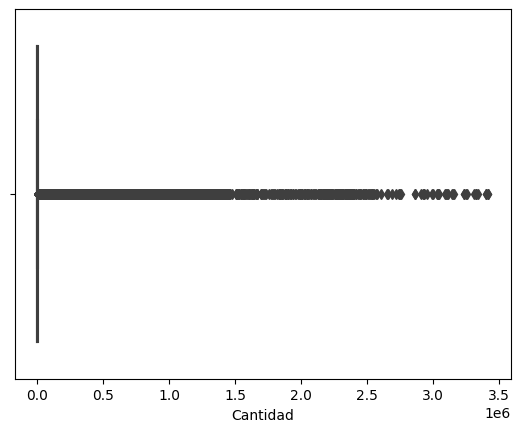

In [13]:
sns.boxplot(x=dataframe['Cantidad'])

<Axes: xlabel='Cantidad', ylabel='provincia'>

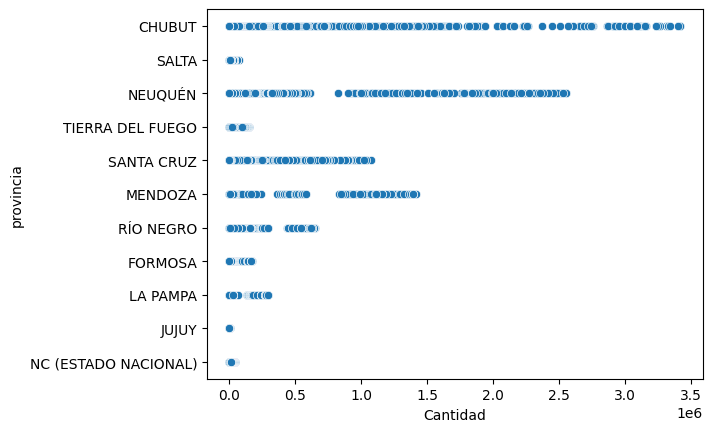

In [17]:
sns.scatterplot(x=dataframe['Cantidad'], y=dataframe['provincia'])